# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.1213,  0.4152,  0.3394,  0.2361,  0.6372,  0.9953,  0.1863,  0.2789,  0.0083,  0.9563,
        0.4056,  0.0963,  0.3595,  0.8286,  0.7354,  0.5697,  0.7383,  0.1388,  0.7829,  0.9552,
        0.2986,  0.4437,  0.3291,  0.8575,  0.941 ,  0.8406,  0.712 ,  0.4408,  0.805 ,  0.3487])

In [6]:
y

array([  8.364 ,   9.2456,   9.0182,   8.7082,   9.9117,  10.9858,   8.5589,   8.8367,   8.0249,
        10.8689,   9.2169,   8.2888,   9.0785,  10.4858,  10.2061,   9.709 ,  10.2149,   8.4165,
        10.3488,  10.8657,   8.8958,   9.331 ,   8.9873,  10.5726,  10.823 ,  10.5219,  10.1361,
         9.3225,  10.4151,   9.0461])

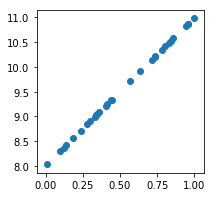

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1826

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!